In [183]:
#CarEvaluation 데이터를 deeplearning으로 classification
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data=pd.read_csv('car.data', header=None, delimiter=',')
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']  # 열 이름 리스트 생성
data.columns = column_names  # 열 이름 할당
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [184]:
#데이터타입 확인
type(data)

pandas.core.frame.DataFrame

In [185]:
#결측치 확인
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [186]:
#컬럼 확인
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

Text(0.5, 1.0, 'Label')

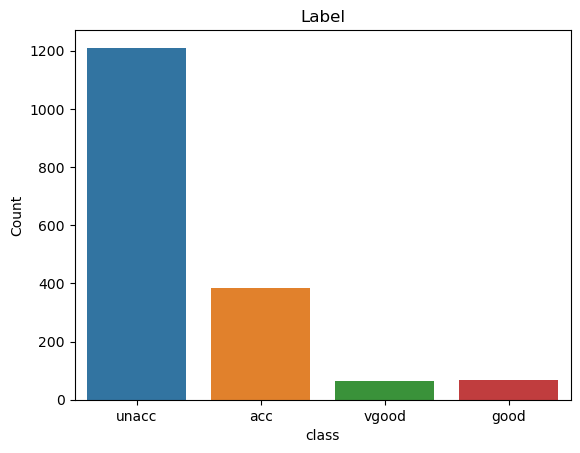

In [187]:
#EDA 수행
sns.countplot(data = data, x='class')
plt.ylabel("Count")
plt.title("Label")

In [188]:
#데이터 숫자화
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for i in data.columns:
    data[i]=encoder.fit_transform(data[i])
   
   

#X, Y(Class) splitting
X = data.iloc[:,0:5].values
y = data.iloc[:,6].values
    
#원핫 인코딩.
Y = pd.get_dummies(y).values


In [189]:
X

array([[3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       ...,
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0]])

In [190]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [191]:
#Splitting the data into training and test test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [192]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(5,input_shape=(5,),activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
Total params: 114 (456.00 Byte)
Trainable params: 114 (456.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 0.5582 - accuracy: 0.5217 - val_loss: 0.5008 - val_accuracy: 0.5434
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.6324 - val_loss: 0.4267 - val_accuracy: 0.6127
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.6628 - val_loss: 0.3968 - val_accuracy: 0.6763
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.6903 - val_loss: 0.3863 - val_accuracy: 0.6850
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.6961 - val_loss: 0.3823 - val_accuracy: 0.6908
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.6954 - val_loss: 0.3792 - val_accuracy: 0.6936
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.7004 - val_loss: 0.3770 - val_accuracy: 0.6965
Epoch 8/100
4

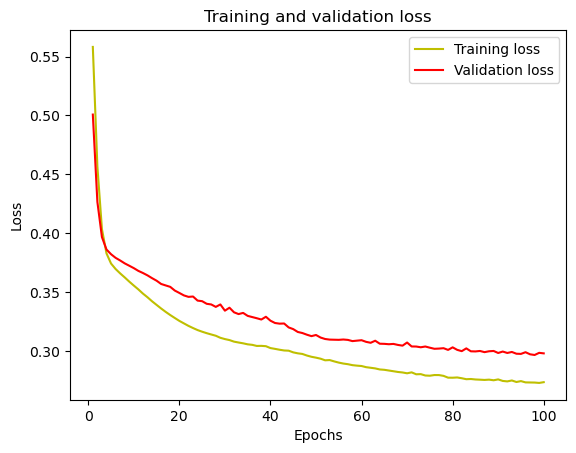

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

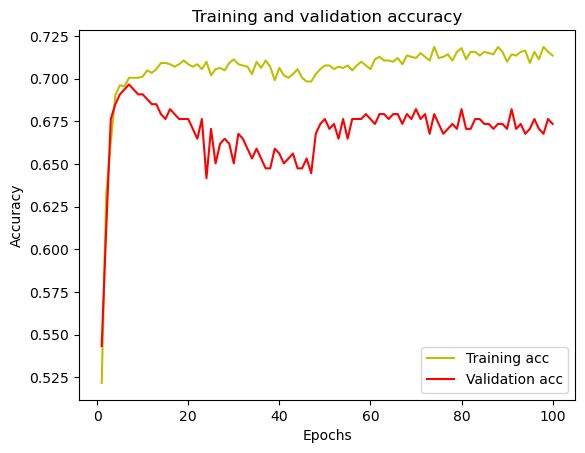

In [195]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [196]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.25      0.10      0.14        79
           1       0.00      0.00      0.00        17
           2       0.72      0.94      0.81       240
           3       0.00      0.00      0.00        10

    accuracy                           0.67       346
   macro avg       0.24      0.26      0.24       346
weighted avg       0.55      0.67      0.60       346

[[  8   0  71   0]
 [  5   0  12   0]
 [ 15   0 225   0]
 [  4   0   6   0]]


c:\Users\synam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\synam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\synam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
